# Project API Zomato

# 1.    <1>  Number of Restaurants Delhi_Ncr vs Rest of India

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
d = pd.read_csv("zomato.csv",encoding ='latin1')
data = d.copy()
data1 = data[data['Country Code'] == 1]

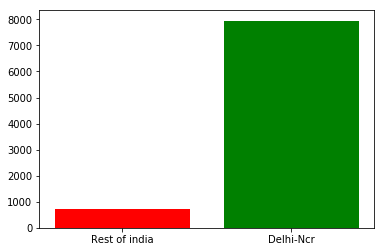

In [16]:
data2 = data1['City'].groupby(data.City).count()
delhi = data2['New Delhi']+data2['Ghaziabad']+data2['Noida']+data2['Gurgaon']+data2['Faridabad']
del data2['New Delhi']
del data2['Ghaziabad']
del data2['Noida']
del data2['Gurgaon']
del data2['Faridabad']
s = data2.sum()
plt.bar(['Rest of india','Delhi-Ncr'],[s,delhi],color = ['Red','Green'])
plt.show()

# 1.  <2>  Cuisines which are not present in restaurant of Delhi NCR but present in rest of India.

In [21]:
# part A

def change(c):
        c = c.split(",")
        c = [x.strip() for x in c]
        return c
    
a,b = [],[]
l =  ['New Delhi','Ghaziabad','Noida','Gurgaon','Faridabad']
data1 = data1[data1['Country Code'] == 1]
delhi_ncr = data1.Cuisines[data1.City.isin(l)].apply(change)
rest = data1.Cuisines[~data1.City.isin(l)].apply(change)
for i in delhi_ncr:
    a += i
for i in rest:
    b += i
result = set(b) - set(a)
print("Cuisines which are not present in restaurant of Delhi NCR but present in rest of India:")
print(result)


Cuisines which are not present in restaurant of Delhi NCR but present in rest of India:
{'Cajun', 'BBQ', 'German', 'Malwani'}


# Check data using zomato API

In [19]:
#part B

import requests
r = requests.get("https://developers.zomato.com/api/v2.1/geocode",headers = {'user-key':'1087ca5bc88feff8d2df939a532bb8f0'},params = {'lat' :'28.4020','lon' : '76.8260'})
data = r.json()
#print(data)
r = requests.get("https://developers.zomato.com/api/v2.1/cuisines",headers = {'user-key':'1087ca5bc88feff8d2df939a532bb8f0'},params = {'city_id':1,'lat' :'28.4020','lon' : '76.8260'})
data = r.json()
cuisine = []
for i in data['cuisines']:
    cuisine.append(i['cuisine']['cuisine_name'])
print("Cuisines served in Delhi Ncr according to zomato api")    
print(cuisine)

Cuisines served in Delhi Ncr according to zomato api
['Afghan', 'African', 'American', 'Andhra', 'Arabian', 'Armenian', 'Asian', 'Assamese', 'Awadhi', 'BBQ', 'Bakery', 'Bar Food', 'Belgian', 'Bengali', 'Beverages', 'Bihari', 'Biryani', 'Brazilian', 'British', 'Bubble Tea', 'Burger', 'Burmese', 'Cafe', 'Cantonese', 'Charcoal Chicken', 'Chettinad', 'Chinese', 'Coffee', 'Continental', 'Cuisine Varies', 'Desserts', 'Ethiopian', 'European', 'Falafel', 'Fast Food', 'Finger Food', 'French', 'Frozen Yogurt', 'German', 'Goan', 'Greek', 'Gujarati', 'Healthy Food', 'Hot dogs', 'Hyderabadi', 'Ice Cream', 'Indonesian', 'Iranian', 'Israeli', 'Italian', 'Japanese', 'Juices', 'Kashmiri', 'Kebab', 'Kerala', 'Konkan', 'Korean', 'Lebanese', 'Lucknowi', 'Maharashtrian', 'Malaysian', 'Mangalorean', 'Mediterranean', 'Mexican', 'Middle Eastern', 'Mishti', 'Mithai', 'Modern Indian', 'Momos', 'Moroccan', 'Mughlai', 'Naga', 'Nepalese', 'North Eastern', 'North Indian', 'Odia', 'Oriental', 'Paan', 'Pakistani', 'P

# Check if there are any common cuisines present in above results of part A and B

In [20]:
cuisine = set(cuisine)
print(result.intersection(cuisine))
print("Hence data present with us is incomplete")

{'BBQ', 'German'}
Hence data present with us is incomplete


# 1. <3> Top 10 cuisines served in Delhi_Ncr and rest of India

[('North Indian', 3597), ('Chinese', 2448), ('Fast Food', 1866), ('Mughlai', 933), ('Bakery', 697), ('South Indian', 569), ('Continental', 547), ('Desserts', 542), ('Street Food', 538), ('Italian', 535)]
[('North Indian', 349), ('Chinese', 242), ('Continental', 177), ('Italian', 147), ('Cafe', 136), ('Fast Food', 97), ('South Indian', 62), ('Mughlai', 59), ('Desserts', 55), ('Mexican', 50)]


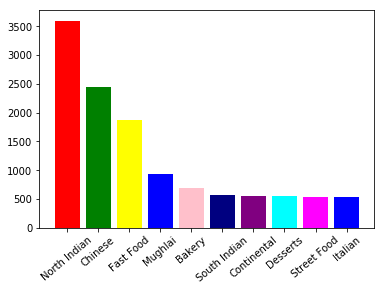

In [48]:
# from Q1 <2>
cuisine_delhi_ncr = {}
cuisine_rest = {}
for i in b:
    if i in cuisine_rest:
        cuisine_rest[i] += 1
    else:
        cuisine_rest[i] = 1
for i in a:
    if i in cuisine_delhi_ncr:
        cuisine_delhi_ncr[i] += 1
    else:
        cuisine_delhi_ncr[i] = 1

#print(cuisine_delhi_ncr)
#print(cuisine_rest)
cuisine_delhi_ncr = sorted(cuisine_delhi_ncr.items(), key=lambda kv: kv[1], reverse=True)
cuisine_rest = sorted(cuisine_rest.items(), key=lambda kv: kv[1], reverse=True)
print(cuisine_delhi_ncr[:10])
print(cuisine_rest[0:10])
delhi,d_v = [],[]
for i in cuisine_delhi_ncr[:10]:
    delhi.append(i[0])
    d_v.append(i[1])
plt.bar(delhi,d_v,color = ['Red','Green','Yellow','Blue','Pink','Navy','Purple','Cyan','Magenta','Blue'])
plt.xticks(rotation = 40)
plt.show()


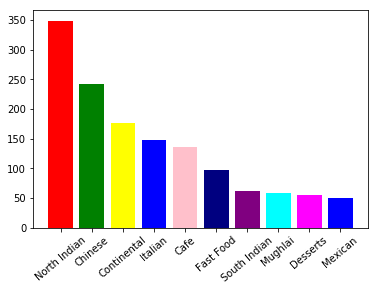

In [49]:
rest,r_v = [],[]
for i in cuisine_rest[0:10][:10]:
    rest.append(i[0])
    r_v.append(i[1])
plt.bar(rest,r_v,color = ['Red','Green','Yellow','Blue','Pink','Navy','Purple','Cyan','Magenta','Blue'])
plt.xticks(rotation = 40)
plt.show()

# 4 Analysis of how cuisine served is different from Delhi NCR to Rest of India. 

Delhi-NCR


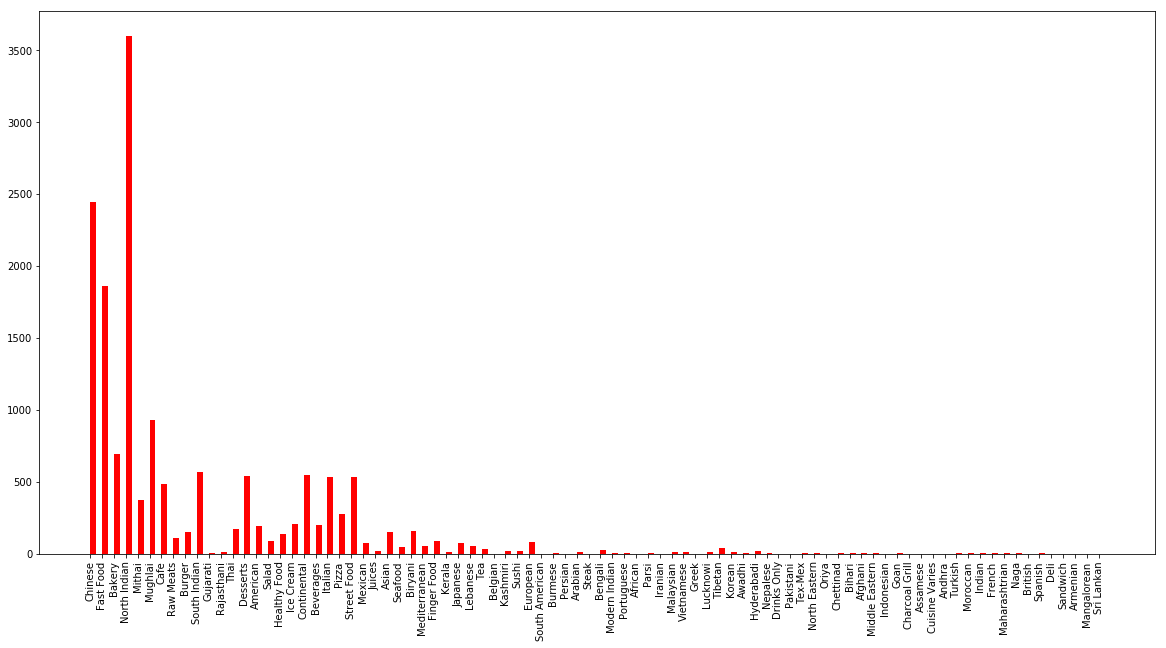

In [37]:
d = {}
for i in a:
    if i in d:
        d[i] += 1
    else:
        d[i] = 1
#print(d)
print("Delhi-NCR")
plt.figure(figsize=(20, 10))  # width:20, height:3
plt.bar(d.keys(), d.values(), align='edge', width=0.5,color=['Red'])
plt.xticks(rotation = 90)
plt.show()

Rest of India


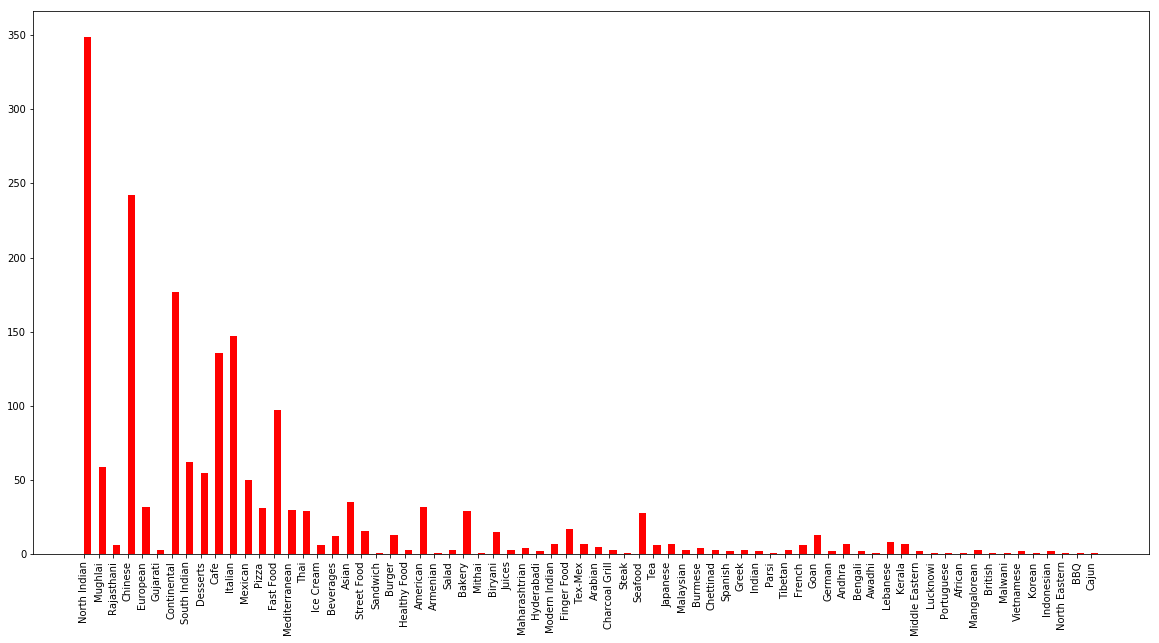

In [40]:
d2 = {}
for i in b:
    if i in d2:
        d2[i] += 1
    else:
        d2[i] = 1
#print(d2)
print("Rest of India")
plt.figure(figsize=(20, 10))  # width:20, height:3
plt.bar(d2.keys(), d2.values(), align='edge', width=0.5,color=['Red'])
plt.xticks(rotation = 90)
plt.show()

In [39]:
print('Cuisines present in Delhi-Ncr but not in rest of India')
print(set(a)-set(b))
print("Cuisines present in Rest of India but not in Delhi-Ncr")
print(set(b)-set(a))

Cuisines present in Delhi-Ncr but not in rest of India
{'Raw Meats', 'Assamese', 'Iranian', 'South American', 'Kashmiri', 'Bihari', 'Sushi', 'Pakistani', 'Oriya', 'Belgian', 'Turkish', 'Persian', 'Deli', 'Naga', 'Nepalese', 'Afghani', 'Cuisine Varies', 'Sri Lankan', 'Moroccan', 'Drinks Only'}
Cuisines present in Rest of India but not in Delhi-Ncr
{'BBQ', 'German', 'Cajun', 'Malwani'}


# Q2 <1> Features tha affect rating

 # 1. Number of votes

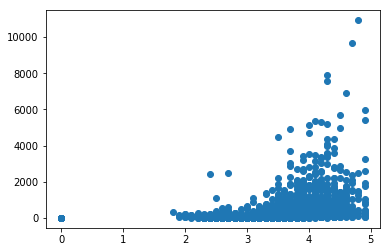

In [51]:
votes = data1['Votes']
r = data1['Aggregate rating']
#print(r)
#print(votes)
plt.scatter(r,votes)
plt.show()

# 2. Restaurant serving more number of cuisines.

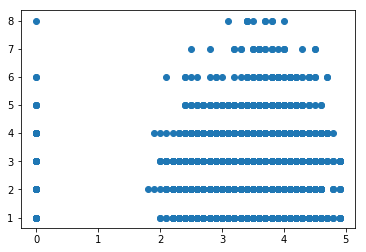

In [8]:
def change(c):
    c = str(c).split(",")
    c = [x.strip() for x in c]
    return len(c)
cuisine = {}
data1["count"] = data1["Cuisines"].apply(change)
for i in data1["Cuisines"]:
    for j in i:
        if j in cuisine:
            cuisine[j] += 1
        else:
            cuisine[j] = 1
count = data1["count"].iloc[:]            
plt.scatter(r,count)
plt.show()

# 3. Average Cost of Restaurant.

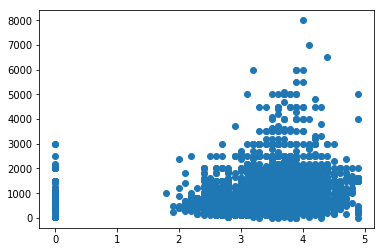

In [9]:
plt.scatter(r,data1["Average Cost for two"])
plt.show()

# 4. Restaurant serving some specific cuisines.
# average rating v/s cuisine

E:\ANACONDA\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


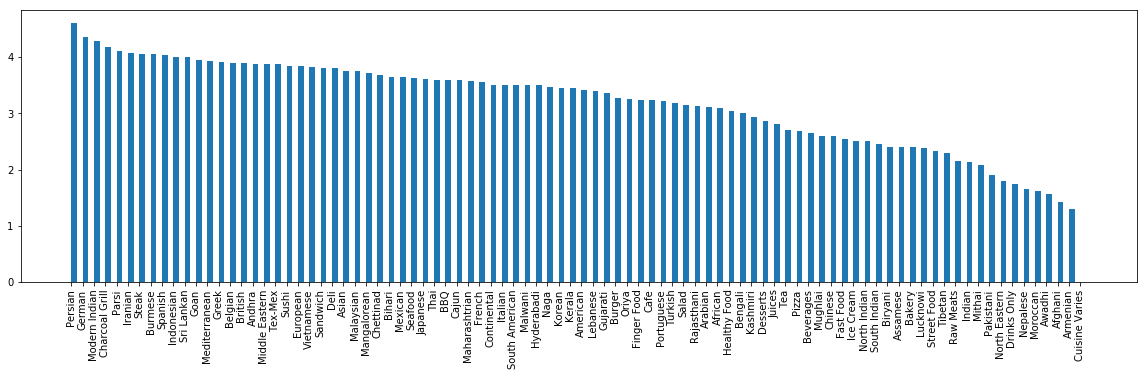

In [56]:
data = d.copy()
data1 = data[data['Country Code'] == 1]

def change(c):
    c = str(c).split(",")
    c = [x.strip() for x in c]
    return c
data1["Cuisines"] = data1["Cuisines"].apply(change)

cuisines = {}
r = data1['Aggregate rating']
for i,val in zip(data1['Cuisines'],r):
    for j in i:
        if j in cuisines:
            cuisines[j] += val
        else:
            cuisines[j] = val
#print(cuisines)
count = {}
for i in data1['Cuisines']:
    for j in i:
        if j in count:
            count[j] += 1
        else:
            count[j] = 1
for i in cuisines:
    cuisines[i] /= count[i] 
cuisine = sorted(cuisines.items(), key=lambda kv: kv[1], reverse=True)
#print(cuisine)
c,v = [],[]
for i in cuisine:
    c.append(i[0])
    v.append(i[1])
plt.figure(figsize=(20, 5))  # width:20, height:3
plt.bar(c, v, align='edge', width=0.5)
plt.xticks(rotation = 90)
plt.show()
#plt.bar(c.keys(),v.values())
#plt.xticks(rotation = 40)

#plt.show()

# 2. <2>  Top 10 localities with more weighted restaurant rating

In [26]:
data2 = list(zip(data1['Locality'],data1['Aggregate rating'],data1['Votes']))
#for i in data2:
 #   print(i[0])
#print(data2)
d1 = data1['Votes'].groupby(data1['Locality']).sum()
#print(d1)
d = {}
r,v = 0.0,0.0
for i in data2:
    if i[0] in d:
        d[i[0]] += i[1]*i[2]
    else:
        d[i[0]] = i[1]*i[2]
            
for i in d.keys():
    if d1[i] != 0.0:
        d[i] = d[i]/d1[i]
    else:
        d[i] = 0
d2 = sorted(d.items(), key=lambda kv: kv[1], reverse=True)
print(d2[0:10])

[('Hotel Clarks Amer, Malviya Nagar', 4.9), ('Aminabad', 4.9), ('Friends Colony', 4.886916367367881), ('Powai', 4.841868613138686), ('Kirlampudi Layout', 4.820161290322581), ('Express Avenue Mall,  Royapettah', 4.8), ('Deccan Gymkhana', 4.8), ('Banjara Hills', 4.7187617260787995), ('Sector 5, Salt Lake', 4.707022552098202), ('Riverside Mall, Gomti Nagar', 4.7)]


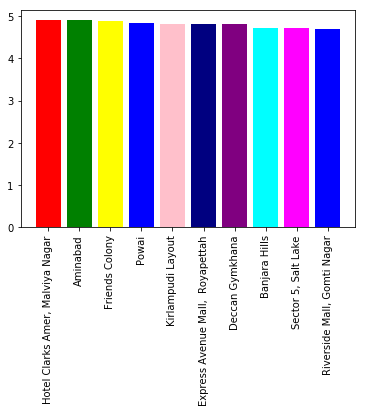

In [27]:
c,v = [],[]
for i in d2[0:10]:
    c.append(i[0])
    v.append(i[1])
plt.bar(c, v,color = ['Red','Green','Yellow','Blue','Pink','Navy','Purple','Cyan','Magenta','Blue'])
plt.xticks(rotation = 90)
plt.show()

# 3. Visualization 

 # <1> Top 15 restaurants have a maximum number of outlets

[83 79 63 51 48 34 29 29 28 25 22 22 22 20 20]
Index(['Cafe Coffee Day', 'Domino's Pizza', 'Subway', 'Green Chick Chop',
       'McDonald's', 'Keventers', 'Giani', 'Pizza Hut', 'Baskin Robbins',
       'Barbeque Nation', 'Barista', 'Dunkin' Donuts', 'Giani's',
       'Pind Balluchi', 'Costa Coffee'],
      dtype='object', name='Restaurant Name')


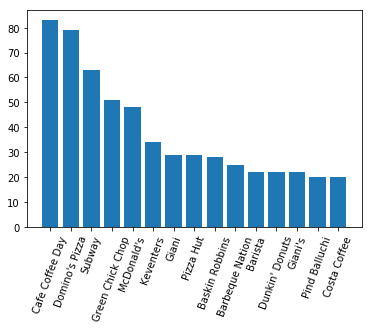

In [12]:
data = d.copy()
data = data[data['Country Code'] == 1]
data = data['Restaurant Name'].groupby(data['Restaurant Name']).count().sort_values(ascending = False)
sizes = data.iloc[:15].values
outlet = data.iloc[:15].index
print(sizes)
print(outlet)
plt.bar(outlet,sizes)
plt.xticks(rotation = 70)
plt.show()

# <2> Histogram of aggregate rating of restaurant( drop the unrated restaurant).


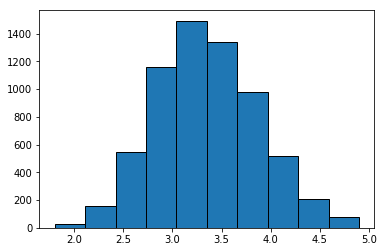

In [108]:
data1 = data1['Aggregate rating']
data1 = data1[data1 != 0]
plt.hist(data1,edgecolor = 'black')
plt.show()

# <3> Plot the bar graph top 10 restaurants in the data with the highest number of votes.

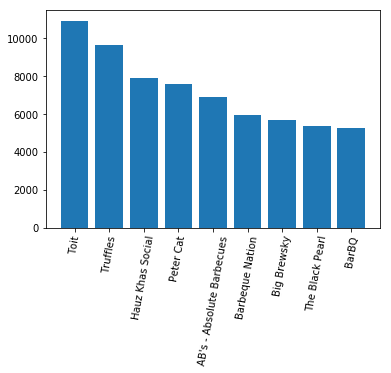

In [7]:

l = []
for i,j in zip(data1['Restaurant Name'],data1['Votes']):
    l.append((i,j))
l.sort(key = lambda x: -x[1])
#print(l)
l = l[0:10]
a,b = [],[]
for i in l:
    a.append(i[0])
    b.append(i[1])
plt.bar(a,b)
plt.xticks(rotation = 80)
plt.show()

# <4> Plot the pie graph of top 10 cuisines present in restaurants in the USA.


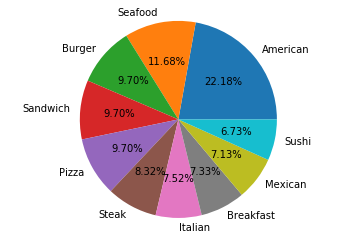

In [29]:
data = d.copy()
data = data[data['Country Code'] == 216]

def change(c):
        c = str(c).split(",")
        c = [x.strip() for x in c]
        return c
    
l = []
c = data.Cuisines = data.Cuisines.apply(change)
#print(data1.Cuisines) 
for i in c:
    l += i
d2 = {}
for i in l:
    if i in d2:
        d2[i] += 1
    else:
        d2[i] = 1

d2 = sorted(d2.items(), key=lambda kv: kv[1], reverse=True)
d2 = d2[0:10]
a,b = [],[]
for i in d2:
    a.append(i[0])
    b.append(i[1])
plt.pie(b,labels = a,autopct = "%.2f%%")
plt.axis("equal")
plt.show()

# <5> Bubble graph of a number of Restaurants present in the city of India and keeping the weighted restaurant rating of the city in a bubble.

In [34]:
data2 = list(zip(data1['City'],data1['Aggregate rating'],data1['Votes']))
#for i in data2:
 #   print(i[0])
#print(data2)
d1 = data1['Votes'].groupby(data1['City']).sum()
#print(d1)
d = {}
r,v = 0.0,0.0
for i in data2:
    if i[0] in d:
        d[i[0]] += i[1]*i[2]
    else:
        d[i[0]] = i[1]*i[2]
            
for i in d.keys():
    if d1[i] != 0.0:
        d[i] = d[i]/d1[i]
    else:
        d[i] = 0
print(d)

{'Agra': 4.00698351115422, 'Ahmedabad': 4.163215392140877, 'Allahabad': 3.409626436781609, 'Amritsar': 3.7645839017735336, 'Aurangabad': 3.427314814814815, 'Bangalore': 4.497423148890671, 'Bhopal': 4.1259297879735835, 'Bhubaneshwar': 3.9677586613245337, 'Chandigarh': 4.106690515324375, 'Chennai': 4.319682253114281, 'Coimbatore': 4.174994074425219, 'Dehradun': 4.016172839506172, 'Faridabad': 3.4829787234042544, 'Ghaziabad': 3.0378698224852068, 'Goa': 4.158438203735593, 'Gurgaon': 3.7439580811138042, 'Guwahati': 4.265733279613215, 'Hyderabad': 4.487772943857468, 'Indore': 3.998346242411556, 'Jaipur': 4.281507965242579, 'Kanpur': 3.853793466807166, 'Kochi': 4.137380191693291, 'Kolkata': 4.295151705424619, 'Lucknow': 4.3235268346111715, 'Ludhiana': 4.083607130373995, 'Mangalore': 3.761117471948706, 'Mohali': 4.3, 'Mumbai': 4.2166077381553695, 'Mysore': 3.76120244246125, 'Nagpur': 4.10865162037037, 'Nashik': 3.5872553699284007, 'New Delhi': 3.76587150268963, 'Noida': 3.472630905726104, 'Pan

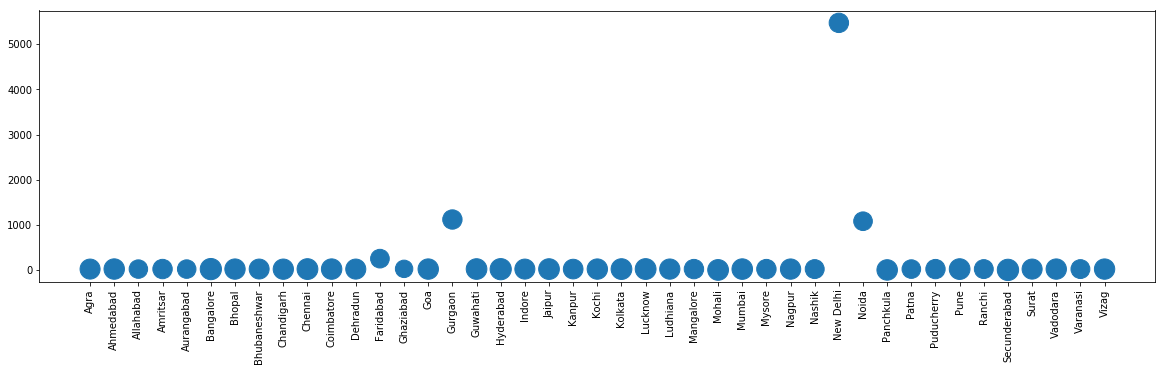

In [40]:
d3 = data1['City'].groupby(data1['City']).count()
#print(d3)
w_r = []
for i in d3.index:
    w_r.append(d[i]*100) # multiplied by 100 for better clarity of graph
plt.figure(figsize=(20, 5))
plt.scatter(d3.index,d3.values,s = w_r)
plt.xticks(rotation = 90)
plt.show()